In [1]:
cd ../..

/home/mb/MEGAsync/academic_work/projects/geometric_model_polycrystals/code/PyAPD


In [2]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/mb/MEGAsync/academic_work/projects/geometric_model_polycrystals/code/PyAPD
  Preparing metadata (setup.py) ... done
  Attempting uninstall: PyAPD
    Found existing installation: PyAPD 0.1.1
    Uninstalling PyAPD-0.1.1:
      Successfully uninstalled PyAPD-0.1.1
  Running setup.py develop for PyAPD


In [3]:
import PyAPD
import time
from pykeops.torch import LazyTensor
import torch
from torchmin import minimize as minimize_torch
import copy
#import ipywidgets as widgets
from matplotlib import animation
from matplotlib import pyplot as plt

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [4]:
N = 20
apd = PyAPD.apd_system(N=N,
                       ani_thres=0.25,
                       pixel_size_prefactor=10,
                       dt=torch.float64,
                       seed = 30,
                      error_tolerance=0.01)
apd.check_optimality()

Precision loss detected!
Percentage error =  116.0330578513077


Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0005)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.023147
         Iterations: 17
         Function evaluations: 19
It took 0.5126378536224365 seconds to find optimal W.


In [10]:
def from_t_to_plot_apd(t=1.0):
    apd.check_optimality()
    apd.from_t_to_W(t)
    apd.plot_apd(t=t)


Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0005)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.022782
         Iterations: 13
         Function evaluations: 15
It took 0.41032838821411133 seconds to find optimal W.
Precision loss detected!
Percentage error =  86.4876033058223
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0005)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.022782
         Iterations: 2
         Function evaluations: 3
It took 0.0939936637878418 seconds to find optimal W.
Precision loss detected!
Percentage error =  85.86776859507785
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0005)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.023074
 

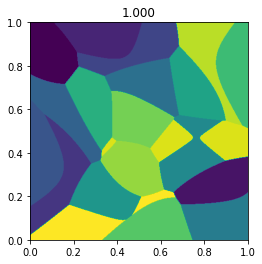

In [12]:
fig = plt.figure()
ax1 = plt.axes()

apd.from_t_to_W(0.0)
img = apd.assemble_apd(t=0.0).reshape(apd.pixel_params).transpose(0,1).cpu()
apd_plot = ax1.imshow(img, origin='lower',
                      extent = torch.flatten( apd.domain ).tolist())
title = ax1.set_title(' ')

T = 10
# initialization function: plot the background of each frame
def init():
    ax1.imshow([[],[]], origin='lower',
                      extent = torch.flatten( apd.domain ).tolist())
    return apd_plot,

# animation function.  This is called sequentially
def animate(i):
    apd.check_optimality()
    apd.from_t_to_W(i/T)
    img = apd.assemble_apd(t=i/T).reshape(apd.pixel_params).transpose(0,1).cpu()
    apd_plot.set_data(img)
    title.set_text("%1.3f" % (i/T))
    return apd_plot, 

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=11, interval=1, blit=True)

anim.save('basic_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

Precision loss detected!
Percentage error =  3.7500000000184333
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0020)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.095048
         Iterations: 9
         Function evaluations: 11
It took 0.04695630073547363 seconds to find optimal W.
Precision loss detected!
Percentage error =  36.735537190091215
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0020)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.094398
         Iterations: 1
         Function evaluations: 3
It took 0.050066232681274414 seconds to find optimal W.
Precision loss detected!
Percentage error =  34.05991735538127
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0020)
Optimality condition successfully overwritten.
Optimization te

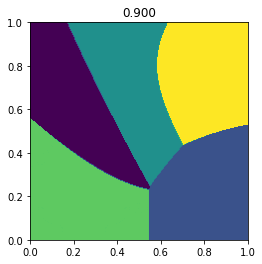

<bound method _ImageBase.set_data of <matplotlib.image.AxesImage object at 0x7f6e6fa9d0d0>>

In [9]:
start=time.time()
apd.OT_dual_function_cont(apd.W,t=0.0)
time_taken = time.time()-start
time_taken

0.010860919952392578

In [10]:
start=time.time()
apd.OT_dual_function_cont2(apd.W,t=0.0)
time_taken = time.time()-start
time_taken

0.0


0.01196599006652832

In [20]:
N = 20
apd = PyAPD.apd_system(N=N,
                       ani_thres=0.25,
                       pixel_size_prefactor=2,
                       dt=torch.float64,
                       seed = 30,
                      error_tolerance=0.01)
apd.check_optimality()

Precision loss detected!
Percentage error =  116.94214876032906


In [22]:
apd.from_t_to_W(0.0)

Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0005)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.022779
         Iterations: 12
         Function evaluations: 14
It took 0.03652215003967285 seconds to find optimal W.


(<Figure size 756x756 with 1 Axes>, <Axes: >)

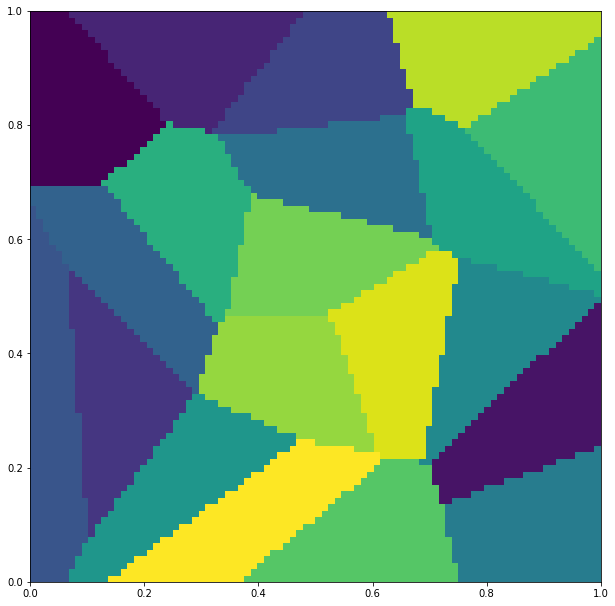

In [23]:
apd.plot_apd(t=0.0)

In [34]:
apd.check_optimality()

The APD is optimal!
Percentage error =  0.7231404958684823


In [40]:
N = 200
apd = PyAPD.apd_system(N=N,
                       ani_thres=0.05,
                       pixel_size_prefactor=2,
                       dt=torch.float64,
                       seed = 30,
                      error_tolerance=0.01)
apd.check_optimality()

Precision loss detected!
Percentage error =  295.60384286503637


In [41]:
start=time.time()
apd.continuation_routine(steps=5,
                         tangent_info=True,
                        error_prefactor = 1.0)
time_taken = time.time()-start
time_taken

Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(5.0000e-05)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.007458
         Iterations: 83
         Function evaluations: 89
It took 4.257627487182617 seconds to find optimal W.
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(5.0000e-05)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.007457
         Iterations: 21
         Function evaluations: 24
It took 1.5278139114379883 seconds to find optimal W.
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(5.0000e-05)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.007454
         Iterations: 22
         Function evaluations: 25
It took 1.707735300064087 seconds to find optimal W.
Sol

11.631864309310913

In [36]:
wtf = 1.0
wtf == 1

True